Iris 품종 분류를 위해 DecisionTree모델 이외의 모델을 적용하여 본다. 
그리고 여러모델들중 어떤 모델이 문제를 해결하는데 적합한지 알아보기위한 성능평가지표에 대해 알아보자

# Scikit-learn 내장 분류모델
- RandomForest
- Support Vector Machine (SVM)
- Stochastic Gradient Descent Classifier (SGDClassifier)
- Logistic Regression

# 1. RandomForest

의사결정나무 모델을 여러개 모아놓은 구조로 단일 모델 사용시의 단점을 극복하여 편향된 결과가 아닌 다양한 결과를 반영해 의사결정을 내릴 수 있다.

Random Forest 사례 : 건강 위험도를 예측 문제 해결 방법
- 성별, 키, 몸무게, 거주지역, 운동량, 기초 대사량, 근육량 등 수많은 요소(Feature, 특성)
- 건강에 영향을 미치는 요소들의 조합으로 트리를 만듬
 - 하나의 거대한 (깊이가 깊은) 결정 트리를 만드는 것이 아니라 여러 개의 작은 결정 트리를 만드는 것 
- 여러가지 의사결정트리 구성은 랜덤하게함.
- 앙상블 : 트리의 결과를 보고 의견을 통합, 즉 1000개의 트리중 70%이상이 위험도가 있다고 판단할때 그 결정을 따름.

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [3]:
iris = load_iris()
iris_data = iris.data
iris_label = iris.target

In [4]:
X_train, X_test, y_train, y_test = train_test_split(iris_data,
                                                   iris_label,
                                                   test_size=0.2,
                                                   random_state=21)

In [5]:
d_tree = RandomForestClassifier(random_state=32)
d_tree.fit(X_train, y_train)
y_pred = d_tree.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.83      0.91        12
           2       0.78      1.00      0.88         7

    accuracy                           0.93        30
   macro avg       0.93      0.94      0.93        30
weighted avg       0.95      0.93      0.93        30



# 2. SVM(Support Vector Machine)
- [참고](https://bskyvision.com/163)

특징
- 선형분류 알고리즘: Support Vector와 Hyperplane(초평면)을 이용해서 분류를 수행
- Decision Boundary(결정 경계): 두 개의 클래스를 구분해 주는 선
- Support Vector: Decision Boundary에 가까이 있는 데이터
- Margin: Decision Boundary와 Support Vector 사이의 거리
![SVM Margin](https://upload.wikimedia.org/wikipedia/commons/thumb/7/72/SVM_margin.png/300px-SVM_margin.png)

Margin이 넓을수록 새로운 데이터를 잘 구분할 수 있다. (Margin 최대화 -> robustness 최대화)

- Kernel Trick: 저차원의 공간을 고차원의 공간으로 매핑해주는 작업. 데이터의 분포가 Linearly separable 하지 않을 경우 데이터를 고차원으로 이동시켜 Linearly separable하도록 만든다.
- cost: Decision Boundary와 Margin의 간격 결정. cost가 높으면 Margin이 좁아지고 train error가 작아진다. 그러나 새로운 데이터에서는 분류를 잘 할 수 있다. cost가 낮으면 Margin이 넓어지고, train error는 커진다.
- γ: 한 train data당 영향을 미치는 범위 결정. γ가 커지면 영향을 미치는 범위가 줄어들고, Decision Boundary에 가까이 있는 데이터만이 선의 굴곡에 영향을 준다. 따라서 Decision Boundary는 구불구불하게 그어진다. (오버피팅 초래 가능) 작아지면 데이터가 영향을 미치는 범위가 커지고, 대부분의 데이터가 Decision Boundary에 영향을 준다. 따라서 Decision Boundary를 직선에 가까워진다.


In [6]:
from sklearn import svm
svm = svm.SVC()

svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.91      0.83      0.87        12
           2       0.75      0.86      0.80         7

    accuracy                           0.90        30
   macro avg       0.89      0.90      0.89        30
weighted avg       0.91      0.90      0.90        30



# 3. SGDClassifier(확률적 경사하강법)
- SGD (Stochastic Gradient Descent) : 배치 크기가 1인 경사하강법 알고리즘
- 특징
 - 데이터 세트에서 무작위로 균일하게 선택한 하나의 예를 의존하여 각 단계의 예측 경사를 계산 
 
 ![sgd](https://www.researchgate.net/profile/Xudong-Huang-4/publication/328106221/figure/fig3/AS:678422925807621@1538760038610/Stochastic-gradient-descent-compared-with-gradient-descent.png)


In [7]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.83      0.91        12
           2       0.78      1.00      0.88         7

    accuracy                           0.93        30
   macro avg       0.93      0.94      0.93        30
weighted avg       0.95      0.93      0.93        30



# 4. Logistic Regression(로지틱스 회위)
- 소프트맥스(softmas) 함수를 사용한 다중 클래스 분류 알고리즘,  소프트맥스 회귀(Softmax Regression)라고도 한다.
- 주의 :  이름은 회귀지만, 실제로는 분류를 수행

In [8]:
from sklearn.linear_model import LogisticRegression
lgs = LogisticRegression()
lgs.fit(X_train, y_train)
y_pred = lgs.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.83      0.91        12
           2       0.78      1.00      0.88         7

    accuracy                           0.93        30
   macro avg       0.93      0.94      0.93        30
weighted avg       0.95      0.93      0.93        30



위와 같이 Scikit-learn에서 제공하는 여러가지 모델들의 학습을 진행해보고 결과도 알아 보았다. 그렇다면 Iris 분류 문제를 해결하기에 가장 적합한 모델은 정확도가 가장 높게 나온 모델일까? 정확도라는 척도만을 통해 모델의 성능을 평가할때 문제점은 없는지? 문제에 따라 정확도 이외의 성능 평가 지표는 무엇이 있는지 알아보자

# 모델의 평가 기준
- 정확도의 함정 : 손글씨 회귀(분류문제가 아닌 숫자 3인지 맞추기) 사례로 정확도의 한계점을 살펴 보자
- 정확도는 전체 데이터 중 맞은 데이터 만 신경 쓰는 척도로 양성데이터를 맞추는 정도 뿐만아니라 음성데이터를 맞추는 것도 중요

In [6]:
from sklearn.datasets import load_digits

digits = load_digits()

data = digits.data
label = digits.target

In [7]:
data.shape, label.shape

((1797, 64), (1797,))

In [8]:
#이미지 확인
print(len(data[0]), type(data[0]))
data[0].reshape(8,8) #8*8의 이미지라는 것을 확인할 수있다.

64 <class 'numpy.ndarray'>


array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

길이 64의 숫자 배열은 (8 x 8) 크기의 이미지를 일렬로 쭉 펴놓은 것으로 배열을 8*8 행렬로 reshape에서 출력해보자

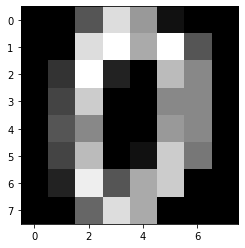

In [12]:
import matplotlib.pyplot as plt
plt.imshow(data[0].reshape(8,8), cmap='gray')


로드한 label데이터는 손글씨 분류용 라벨이므로 타겟데이터 변경필요하다
- 숫자 3만 1, 나머지는 0으로 만들기

In [23]:
label

array([0, 1, 2, ..., 8, 9, 8])

In [24]:
new_label = [1 if i==3 else 0 for i in label]
new_label[:20]

[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]

의사결정나무 모델로 손글씨 3에 대한 분류 학습을 진행하고 결과를 확인해보자

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(data, new_label, test_size=0.2, random_state=7)
dtree = DecisionTreeClassifier(random_state=32)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=32)

In [26]:
'test samples : ', len(X_test), '3 counts:', sum(y_test)

('test samples : ', 360, '3 counts:', 34)

테스트셋의 크기는 360개이고 그중 3인 숫자는 34인것을 확인할수 있다. 나머지 숫자는 326개일 것이다

In [32]:
#총 360개 결과에 대한 확인
print(len(y_test)) 


360


In [27]:
y_pred = dtree.predict(X_test)

confusion_matrix(y_test, y_pred)

array([[317,   9],
       [  4,  30]])

오차행렬의 각 요수의 값은 TP : 317, FN : 9, FP:4, TN:30 으로 0은 Positive, 3이 Negative역할을 한다고 할때, TP(실제 0인데 0이 맞다고 예측한 값), TN(실제 0인 아닌데 0이 아니라고 예측한 값)은 크고 FN과 FP 는 비교적 작은 것을 확인할 수있다. classification_report로 자세한 점수를 확인해보자

In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       326
           1       0.77      0.88      0.82        34

    accuracy                           0.96       360
   macro avg       0.88      0.93      0.90       360
weighted avg       0.97      0.96      0.96       360



# 숫자 3 대한 이진분류 문제 고찰
- 96%의 높은 정확도가 나옴
- **불균형한 데이터(Unbalanced Data)** : 숫자 3인 데이터비율 10%, 다른 숫자 데이터비율은 90%로 정답을 모두 0으로만 예측해도 정확도가 90%가 나올수 있다
- 불균형한 데이터인 경우 정확도의 함정: 정확도는 클래스의 비율, 분포에 따라 모델의 성능을 잘 평가하지 못하는 경우가 있다


정확도의 문제점을 알아보기위해 모든 숫자를 0으로 예측한 fake_pred 를 임의로 만들어 오차행렬을 살펴보자

# 오차 행렬으로 fake_pred 성능 평가를 다시해보자
- 손글씨 문제에서의 0은 Positive 역할을, 3은 Negative 역할

In [28]:
fake_pred = [0]*len(y_pred)

confusion_matrix(y_test, fake_pred)

array([[326,   0],
       [ 34,   0]])

위 오차행렬의 각 요소의 값은 TP : 326, FN : 0, FP:34, TN:0 으로 나타난다. 모든 숫자를 0으로 예측했기 때문에  Positive로 예측컬럼에만 값이 있고 Negative로 예측한 것(숫자3에 대한 분류)은 없다. FN과 TN은 둘 다 0이다. 이럴때 precision, recall, f1-score는 어떠할까?

In [20]:
print(classification_report(y_test, fake_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       326
           1       0.00      0.00      0.00        34

    accuracy                           0.91       360
   macro avg       0.45      0.50      0.48       360
weighted avg       0.82      0.91      0.86       360



/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**y_pred와 fake_pred 모두 정확도에서는 0.96, 0.91으로 큰 차이가 없지만 오차행렬을 통한 성능 평가 지표 클래스3에 대한  precision, recall, f1-score 는 0으로 나왔다. 즉 숫자 3에 대해 제대로 분류를 하지 못하는 것이라고 할 수있다. 이렇게 정확도가 높아도 다른 수치값이 너무 낮다면 해당 모델의 데이터가 불균형 하지 않는지 살펴 보아야할 것이다.**


---

**UndefinedMetricWarning: Precision and F-score are ill-defined 문구에 대하여**

--> 이 경고는 레이블 중 하나가 모델에 대해 예측되지 않기 때문에 classification_report 출력이 영향을 받는다는 의미. 이런 경고 메세지를 본다면 불균형 데이터가 없는지, 데이터에 개선할 점은 없는지 살펴볼 필요가 있겠다.




# 다양한 성능 평가 지표

- 평가지표 : 학습시킨 모델의 성능이나 그 예측 결과의 좋고 나쁨을 측정하는 지표
 - 프로젝트가 시작되면 주어진 평가지표에 맞춰 모델을 최적화하여 개발해야함.

- 회귀의 평가 지표
 1. RMSE
 2. RMSLE
 3. MAE
 4. 결졍계수
- 이진 분류의 평가 지표
 1. 정확도(Accuracy)
 2. 오차행렬(Confusion Matrix)
 3. 정밀도(Precision)
 4. 재현율(Recall, Sensitivity)
 5. F1 스코어(f1 score)
 6. MCC(매튜 상관 계수)
 7. 로그손실
 8. AUC
- 다중 분류의 평가 지표
 1. 정확도(Accuracy)
 2. 로그손실
 3. mean-F1, macro-F1, micro-F1
 4. QWK

# 오차 행렬(Confusion Matrix)
- 정답과 오답을 구분하여 표현하는 방법으로 행에 실제 클래스, 열에 예측된 클래스의 인스턴스를 나타내는 성능 평가 지표이다.
- [참고](https://manisha-sirsat.blogspot.com/2019/04/confusion-matrix.html)

![table](https://2.bp.blogspot.com/-EvSXDotTOwc/XMfeOGZ-CVI/AAAAAAAAEiE/oePFfvhfOQM11dgRn9FkPxlegCXbgOF4QCLcBGAs/s1600/confusionMatrxiUpdated.jpg)

- 각 행은 실제 클래스(Actual Class)를 나타낸다. 코로나의 예시를 계속 생각해 볼 때, Actual Class가 Positive라면 환자는 실제 코로나바이러스에 감염된 것이며, 반대로 Actual Class가 Negative라면 환자는 건강한 상태라고 할수 있다.
- 각 열은 예측된 클래스(Predicted Class)로 Predicted Class가 Positive라면 진단 결과가 양성, Negative라면 진단 결과가 음성인 것을 말한다.
- 예측결과
 - TP(True Positive) : 실제 환자에게 양성판정 / 스팸을 스팸으로 예측
 - FN(False Negative) : **실제 환자에게 음성판정(문제상황)** / 스팸을 스팸이 아닌 일반메일로 예측
 - FP(False Positive) : 건강한 사람에게 양성판정 / 일반 메일을 스팸으로 예측
 - TN(True Negative) : 건강한 사람에게 음성판정 / **일반메일을 스팸이라고 예측(문제상황)**
 
- 성능 지표 : Precision, Negative Predictive Value, Sensitivity, Specificity, Accuracy

TP, FN, FP, TN의 수치로 계산되는 성능 지표 중 대표적으로 쓰이는 것은 정밀도(Precision), 재현율(Recall, Sensitivity), F1 스코어(f1 score) 이다.


 - 정밀도(Precision) = TP / TP+FP
 양성 클래스라고 예측한 샘플(TP+FP) 중 실제로 양성 클래스에 속하는 샘플(TP) 샘플 수의 비율.

높을수록 좋다. '예측값'을 기준으로 한 '정답인 예측값'의 비율로 생각하면 쉽다.

 - 재현율(Recall, Sensitivity) = TP /TP+FN
 실제 양성 클래스에 속한 샘플(TP+FN) 중 양성 클래스라고 예측한 샘플(TP) 샘플 수의 비율.
역시 높을수록 좋다. '실제 값'을 기준으로 한 '정답인 예측값'의 비율로 생각하면 쉽다.

 - F1 스코어(f1 score) : Recall과 Precision의 조화평균
 - 정확도(Accuracy) = TP+TN / TN+TP+FN+FP
전체 샘플 중 맞게 예측한 샘플 수의 비율.




# 성능 평가 지표 선정의 중요성

- 손글씨 문제를 이진분류 문제로 바꾼후 살펴본 정확도는 y_pred와 fake_pred 모두 0.94, 0.925로 높았지만 클래스별(클래스 데이터가 불균형하게 적은경우)로 제대로된 평가를 못하는 경우가 발생하였다.
이렇게 label 데이터가 불균형하게 분포되어있는 이진분류 모델에 정확도로 성능을 평가한다면 모델의 신뢰성이 떨어질것이다. 이런 경우 다른 성능지표로 사용하거나 불균형한 데이터셋의 비율을 바꾸는 것이 좋겠다

- 특수한 문제(스팸,암진단)의 경우 그에 맞는 성능지표를 선정하여 모델을 평가해야할 것이다.


# Reference
- [[합격/탈락 이진 분류모델]을 통해 [Confusion Matrix 해석, Precision&Recall] 알아보기](https://dataartist-kor.tistory.com/entry/%ED%95%A9%EA%B2%A9%ED%83%88%EB%9D%BD-%EC%9D%B4%EC%A7%84-%EB%B6%84%EB%A5%98%EB%AA%A8%EB%8D%B8-Report%EB%A5%BC-%ED%86%B5%ED%95%B4-%EC%95%8C%EC%95%84%EB%B3%B4%EB%8A%94-%EB%AA%A8%EB%8D%B8-%EC%84%B1%EB%8A%A5-%EA%B2%80%EC%A6%9D-Confusion-Matrix-%ED%95%B4%EC%84%9D-PrecisionReca)
- UndefinedMetricWarning : https://www.python2.net/questions-1184785.htm
- 머신러닝 시스템을 디자인 하는 방법 : https://daeson.tistory.com/197
- 데이터 불균형 해결방법 : https://shinminyong.tistory.com/34